### Análisis 2 — Análisis y correlación del sueño. 

### Objetivo

Evaluar cómo la calidad del sueño y los niveles de estrés se relacionan con el índice de felicidad y el tiempo de pantalla, identificando patrones conjuntos que permitan comprender el bienestar general de los participantes. Este análisis busca determinar si existen efectos combinados de sueño y estrés sobre la felicidad reportada.

### Descripción

En esta segunda etapa del análisis se examinan las variables *Sleep_Quality* y *Stress_Level* en conjunto con *Happiness_Index* y *Daily_Screen_Time*.  
Se aplican estadísticas descriptivas, análisis exploratorio y visualizaciones para detectar tendencias, relaciones y posibles interacciones entre estas variables. Este enfoque permite comprender mejor cómo la combinación de sueño y estrés influye en los niveles de bienestar y el uso de dispositivos digitales.


Imports, definiciones de rutas y carga del csv. 

In [1]:
#Configuración del entorno (paths + imports del sistema)
import os
import sys

# Agregar el directorio padre al sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

print(f"Ruta principal añadida a sys.path: {parent_dir}")

Ruta principal añadida a sys.path: c:\Users\Juan Pablo\Desktop\ENOVA\Proyectos de desarrollo\MindTech-DataAnalysis


In [2]:
#Imports principales del proyecto
# Librerías principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Módulos propios
from src.carga import cargar_dataset
from src import analisisPreprocesamiento

In [3]:
# Cargar dataset
df = cargar_dataset('../data/processed/pre_analizado.csv')

Selección de variables y prepraración del df 'df2'. 

In [ ]:
df2 = df[['Happiness_Index(1-10)', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)']]

Estadística descriptiva. 

In [5]:
df2.describe()

,Happiness_Index(1-10),Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10)
count,500.000000,500.000000,500.000000,500.000000
mean,8.376000,5.530000,6.304000,6.618000
std,1.524228,1.734877,1.529792,1.542996
min,4.000000,1.000000,2.000000,2.000000
25%,7.000000,4.300000,5.000000,6.000000
50%,9.000000,5.600000,6.000000,7.000000
75%,10.000000,6.700000,7.000000,8.000000
max,10.000000,10.800000,10.000000,10.000000


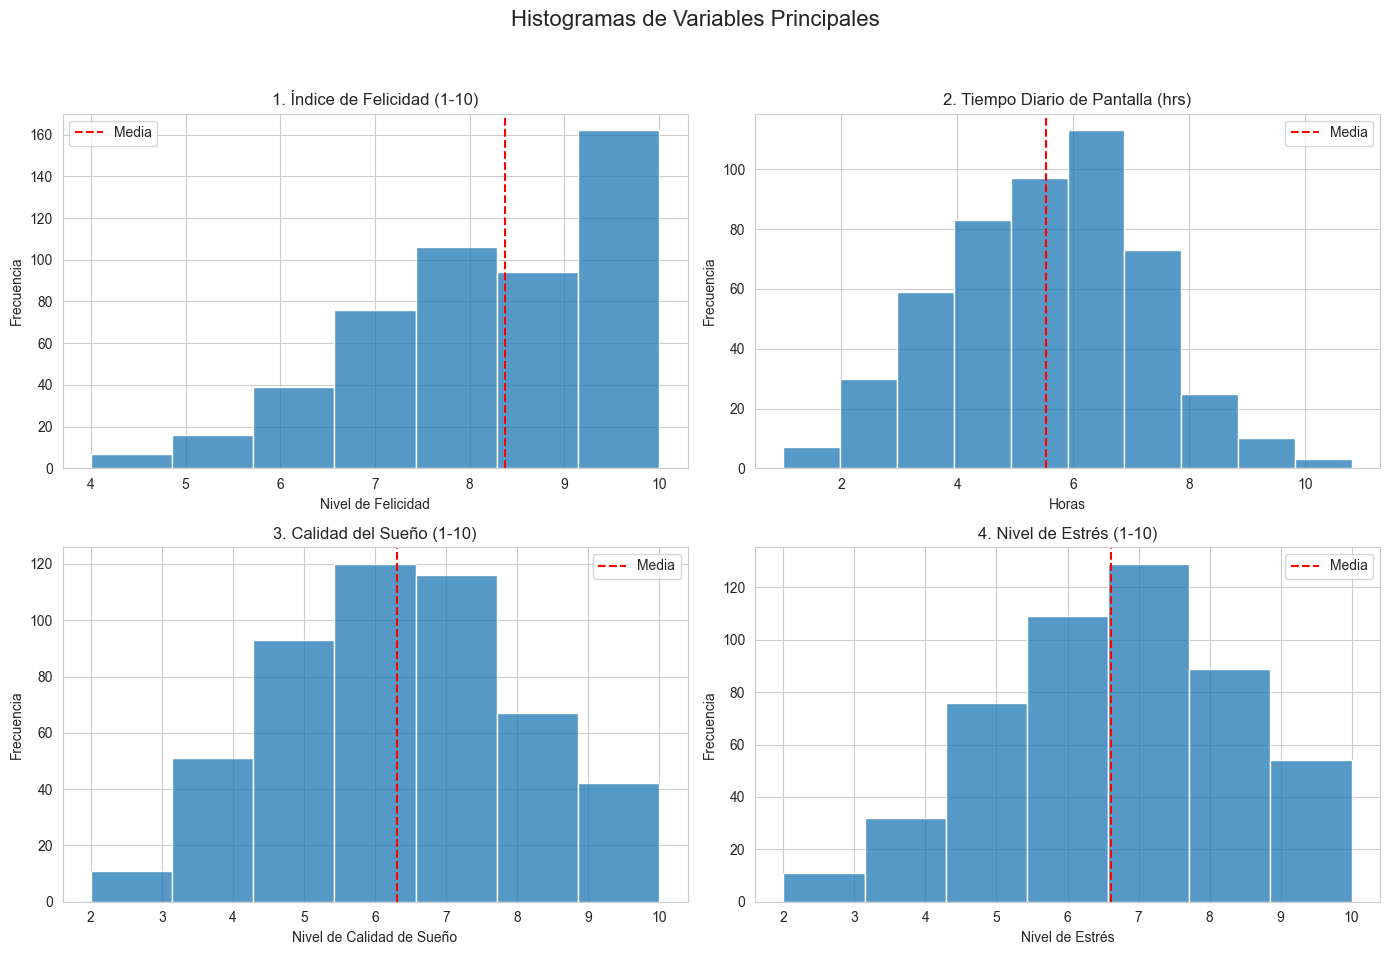

In [6]:
#Histograma para visualizar la distribución de las variables. 


# Configuración de estilo
sns.set_style("whitegrid")

# Crear figura con 4 gráficos (2 filas x 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Histogramas de Variables Principales', fontsize=16)

# 1. Happiness_Index(1-10)
sns.histplot(df2['Happiness_Index(1-10)'], bins=7, ax=axes[0, 0])
axes[0, 0].set_title('1. Índice de Felicidad (1-10)')
axes[0, 0].set_xlabel('Nivel de Felicidad')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df2['Happiness_Index(1-10)'].mean(), color='red', linestyle='--', label='Media')
axes[0, 0].legend()

# 2. Daily_Screen_Time(hrs)
sns.histplot(df2['Daily_Screen_Time(hrs)'], bins=10, ax=axes[0, 1])
axes[0, 1].set_title('2. Tiempo Diario de Pantalla (hrs)')
axes[0, 1].set_xlabel('Horas')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(df2['Daily_Screen_Time(hrs)'].mean(), color='red', linestyle='--', label='Media')
axes[0, 1].legend()

# 3. Sleep_Quality(1-10)
sns.histplot(df2['Sleep_Quality(1-10)'], bins=7, ax=axes[1, 0])
axes[1, 0].set_title('3. Calidad del Sueño (1-10)')
axes[1, 0].set_xlabel('Nivel de Calidad de Sueño')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(df2['Sleep_Quality(1-10)'].mean(), color='red', linestyle='--', label='Media')
axes[1, 0].legend()

# 4. Stress_Level(1-10)
sns.histplot(df2['Stress_Level(1-10)'], bins=7, ax=axes[1, 1])
axes[1, 1].set_title('4. Nivel de Estrés (1-10)')
axes[1, 1].set_xlabel('Nivel de Estrés')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].axvline(df2['Stress_Level(1-10)'].mean(), color='red', linestyle='--', label='Media')
axes[1, 1].legend()

# Ajuste del espaciado para que no se superpongan los títulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Análisis de estadística descriptiva.

A partir del resumen estadístico de 'df2' se obtienen las siguientes conclusiones:

- **Felicidad elevada y distribución concentrada en valores altos:**  
  La media de `Happiness_Index` es **8.38** y la mediana **9.00**, lo que indica que más de la mitad de la muestra se ubica en los valores superiores de la escala (9 y 10). El rango (4–10) muestra algunos casos con menor bienestar, aunque no suficientes para modificar la fuerte concentración de valores altos.

- **Tiempo de pantalla heterogéneo:**  
  `Daily_Screen_Time` presenta una media de **5.53 horas**, una mediana de **5.60 horas** y una desviación estándar de aproximadamente **1.73**. La similitud entre media y mediana sugiere una distribución relativamente simétrica, pero el amplio rango (1.0–10.8 horas) evidencia **variabilidad considerable** entre individuos, con coexistencia de usuarios de bajo y alto uso de pantallas.

- **Calidad del sueño moderada:**  
  `Sleep_Quality` muestra una media de **6.30** y una mediana de **6.00**, con el 75 % de la muestra en valores de 7 o menos. Esto indica que la mayoría no experimenta una calidad de sueño excelente, aunque tampoco predominan niveles muy bajos.

- **Nivel de estrés en valores moderado-altos:**  
  `Stress_Level` registra una media de **6.62** y una mediana de **7.00**, lo que refleja que gran parte de los participantes reporta niveles de estrés por encima del punto medio de la escala. El cuartil superior ubicado en 8 sugiere que un grupo significativo experimenta estrés elevado.

- **Contraste entre felicidad alta y condiciones menos favorables:**  
  Los datos muestran un contraste llamativo: niveles de felicidad consistentemente altos junto con una calidad de sueño moderada y niveles de estrés que tienden a ser altos. Esta combinación puede explicarse por:  
  (a) **Heterogeneidad interna** en la muestra, donde subgrupos muy felices elevan el promedio general;  
  (b) **Efecto techo** en la variable de felicidad, ya que la concentración en 9–10 reduce la variabilidad y mantiene la media elevada.

En síntesis, el dataset describe una población que reporta **alto bienestar subjetivo**, acompañado de **hábitos de pantalla muy diversos**, una **calidad de sueño moderada** y **niveles de estrés superiores al punto medio de la escala**.


Correlaciones cruzadas. 

In [7]:
df2.corr()

,Happiness_Index(1-10),Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10)
Happiness_Index(1-10),1.000000,-0.705206,0.678829,-0.737213
Daily_Screen_Time(hrs),-0.705206,1.000000,-0.758910,0.739891
Sleep_Quality(1-10),0.678829,-0.758910,1.000000,-0.584899
Stress_Level(1-10),-0.737213,0.739891,-0.584899,1.000000


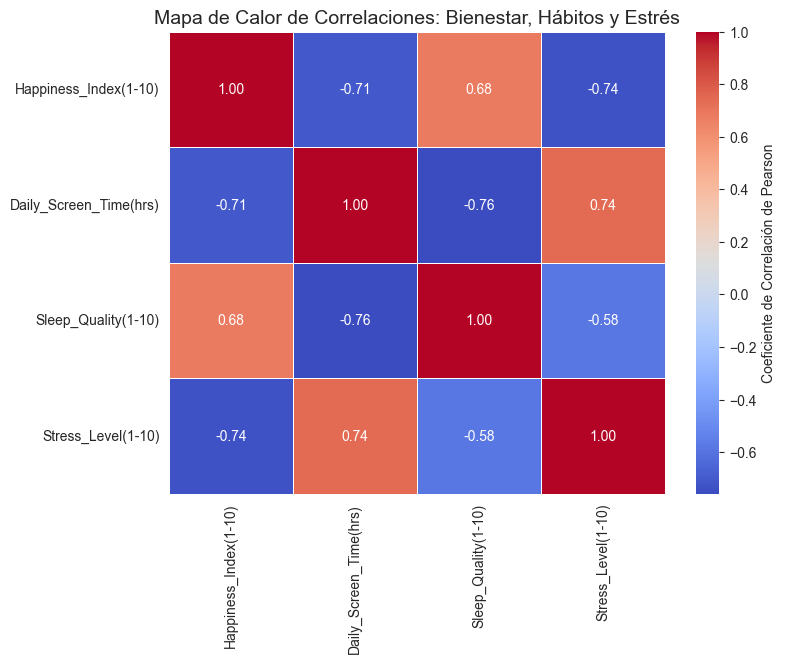

In [ ]:
# Calcular la matriz de correlación 
correlation_matrix = df2[['Happiness_Index(1-10)', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)']].corr()

# Configuración del gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Mostrar los valores de correlación en las celdas
    cmap='coolwarm',         # Esquema de color: Coolwarm resalta relaciones positivas (rojo) y negativas (azul)
    fmt=".2f",               # Formato de 2 decimales para los coeficientes
    linewidths=.5,           # Añadir líneas para mejorar la lectura de las celdas
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
)

plt.title('Mapa de Calor de Correlaciones: Bienestar, Hábitos y Estrés', fontsize=14)
plt.show()

## Análisis de la Matriz de Correlación.

La matriz de correlaciones permite identificar cómo se comportan las variables entre sí dentro del dataset. Los coeficientes muestran relaciones fuertes y consistentes, lo que ayuda a entender mejor los factores que influyen en el bienestar reportado.

### 1. Relaciones con el índice de felicidad
- **Happiness_Index y Stress_Level (r = -0.737):**  
  Esta es la relación negativa más fuerte del análisis. A medida que aumenta el estrés, la felicidad tiende a disminuir de forma significativa. La magnitud del coeficiente indica que el estrés es uno de los factores más asociados al bienestar general dentro de la muestra.

- **Happiness_Index y Daily_Screen_Time (r = -0.705):**  
  Existe una correlación negativa fuerte entre tiempo de pantalla y felicidad. Esto sugiere que un uso elevado de pantallas puede estar vinculado con un menor bienestar subjetivo.

- **Happiness_Index y Sleep_Quality (r = 0.679):**  
  La relación es positiva y fuerte. Los participantes que reportan mejor calidad de sueño también tienden a reportar niveles más altos de felicidad. Aunque algo menor que la correlación con el estrés, sigue siendo un vínculo importante.

### 2. Relaciones centradas en el tiempo de pantalla
- **Daily_Screen_Time y Sleep_Quality (r = -0.759):**  
  Esta es la correlación más intensa de toda la matriz. A mayor uso de pantallas, peor calidad del sueño. La fuerza del coeficiente sugiere que el tiempo de pantalla podría actuar como un factor clave en la variabilidad del descanso.

- **Daily_Screen_Time y Stress_Level (r = 0.739):**  
  La relación positiva indica que quienes pasan más tiempo frente a pantallas tienden a presentar niveles de estrés más altos. Esta tendencia complementa el vínculo negativo observado entre pantalla y sueño.

### 3. Relaciones asociadas al sueño
- **Sleep_Quality y Stress_Level (r = -0.585):**  
  La correlación es negativa y de magnitud moderada. Una mejor calidad del sueño se relaciona con niveles más bajos de estrés, lo cual es consistente con patrones habituales de salud y bienestar.

### Conclusión General
Las correlaciones muestran un conjunto de relaciones coherentes donde el tiempo de pantalla, el sueño y el estrés se encuentran estrechamente vinculados entre sí y con la felicidad. En términos generales, más tiempo de pantalla se asocia con peor sueño y mayor estrés, mientras que una mejor calidad del sueño favorece niveles más altos de felicidad. Estas asociaciones sugieren que el bienestar reportado en la muestra está influido por una combinación de hábitos y factores emocionales, más que por una única variable aislada.



Promedio: felicidad según grupos de sueño

In [9]:
df2['SleepGroup'] = pd.cut(
    df2['Sleep_Quality(1-10)'],
    bins=[1,4,7,10],
    labels=['Poco','Normal','Mucho']
)

df2.groupby('SleepGroup')['Happiness_Index(1-10)'].mean()


C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_10112\3508693289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SleepGroup'] = pd.cut(
C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_10112\3508693289.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby('SleepGroup')['Happiness_Index(1-10)'].mean()


SleepGroup
Poco      6.451613
Normal    8.310030
Mucho     9.669725
Name: Happiness_Index(1-10), dtype: float64

Promedio: felicidad según niveles de estrés. 

In [10]:
df2.groupby('Stress_Level(1-10)')['Happiness_Index(1-10)'].mean()

Stress_Level(1-10)
2.0     10.000000
3.0     10.000000
4.0      9.906250
5.0      9.776316
6.0      8.944954
7.0      8.263566
8.0      7.235955
9.0      6.150000
10.0     6.214286
Name: Happiness_Index(1-10), dtype: float64

Relación bidereaccional: pantalla + happinesIndex dentro de cada grupo de sueño. 

In [11]:
df2.groupby('SleepGroup')[['Daily_Screen_Time(hrs)', 'Happiness_Index(1-10)']].mean()

C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_10112\1292984378.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby('SleepGroup')[['Daily_Screen_Time(hrs)', 'Happiness_Index(1-10)']].mean()


,Daily_Screen_Time(hrs),Happiness_Index(1-10)
SleepGroup,,
Poco,7.600000,6.451613
Normal,5.743161,8.310030
Mucho,3.709174,9.669725


C:\Users\Juan Pablo\AppData\Local\Temp\ipykernel_10112\177256849.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df2.groupby('SleepGroup')[['Happiness_Index(1-10)',


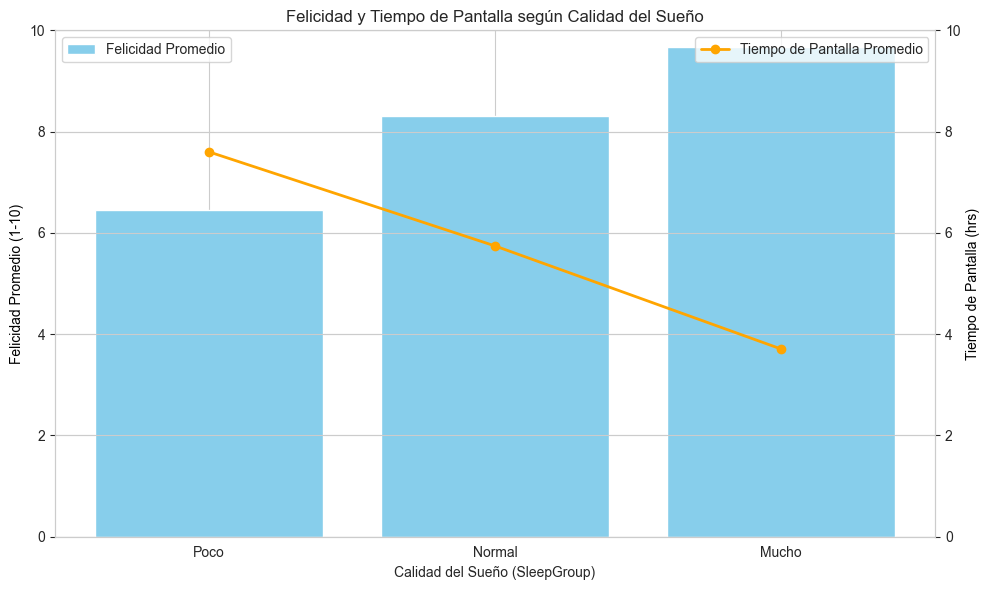

In [12]:
# Agrupamos por SleepGroup y calculamos los promedios
df_grouped = df2.groupby('SleepGroup')[['Happiness_Index(1-10)', 
                                        'Daily_Screen_Time(hrs)']].mean()

# Creamos la figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# ---- BARRAS (Felicidad) ----
ax1.bar(
    df_grouped.index,
    df_grouped['Happiness_Index(1-10)'],
    color='skyblue',
    label='Felicidad Promedio'
)

ax1.set_xlabel('Calidad del Sueño (SleepGroup)')
ax1.set_ylabel('Felicidad Promedio (1-10)', color='black')
ax1.set_ylim(0, 10)

# ---- LÍNEA (Tiempo de Pantalla) ----
ax2 = ax1.twinx()

ax2.plot(
    df_grouped.index,
    df_grouped['Daily_Screen_Time(hrs)'],
    marker='o',
    color='orange',
    linewidth=2,
    label='Tiempo de Pantalla Promedio'
)

ax2.set_ylabel('Tiempo de Pantalla (hrs)', color='black')
ax2.set_ylim(0, 10)

# ---- Título ----
plt.title('Felicidad y Tiempo de Pantalla según Calidad del Sueño')

# ---- Leyendas ----
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Análisis Integrado.

Este análisis combina los tres outputs y los interpreta de forma conjunta para entender la relación entre sueño, estrés, tiempo de pantalla y felicidad.

---

#### 1) Calidad de sueño y felicidad

**Promedio de felicidad según grupo de sueño:**

| SleepGroup | Happiness |
|-----------|-----------|
| Poco      | 6.45      |
| Normal    | 8.31      |
| Mucho     | 9.67      |

**Interpretación:**  
A mayor calidad de sueño, mayor nivel de felicidad.  
La progresión es clara y casi lineal, sugiriendo que el sueño actúa como un “amplificador” del bienestar emocional.

---

#### 2) Estrés y felicidad

**Promedio de felicidad según nivel de estrés:**

| Estrés | Felicidad |
|--------|-----------|
| 2–4    | ~10.0     |
| 5–7    | ~8.2–9.7  |
| 8–10   | ~6.1–7.2  |

**Interpretación:**  
El estrés muestra una relación fuertemente inversa con la felicidad.  
A partir del nivel 7–8, la caída de felicidad se vuelve más abrupta, indicando un punto crítico donde el estrés impacta significativamente en el bienestar.

---

#### 3) Sueño, tiempo de pantalla y felicidad (combinado)

**Promedios por grupo de sueño:**

| SleepGroup | Daily_Screen_Time (hrs) | Happiness |
|------------|--------------------------|-----------|
| Poco       | 7.60                     | 6.45      |
| Normal     | 5.74                     | 8.31      |
| Mucho      | 3.71                     | 9.67      |

##### Interpretación integrada:

- Peor calidad de sueño → más horas de pantalla → menos felicidad.  
- A medida que mejora el sueño, las horas frente a pantallas caen casi 4 horas entre *Poco* y *Mucho*.  
- El grupo con mejor sueño, menor exposición a pantallas y menor estrés coincide con la felicidad más alta.

Esto coincide con las correlaciones observadas:

- **Screen_Time vs Sleep_Quality:** −0.76  
- **Sleep_Quality vs Happiness:** +0.68  
- **Screen_Time vs Happiness:** −0.70



IQR para valores atípicos de calidad del sueño. 

In [13]:
Q1 = df2['Sleep_Quality(1-10)'].quantile(0.25)
Q3 = df2['Sleep_Quality(1-10)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_sueno = df2[(df2['Sleep_Quality(1-10)'] < lower_bound) | (df2['Sleep_Quality(1-10)'] > upper_bound)]
print(outlier_sueno)

Empty DataFrame
Columns: [Happiness_Index(1-10), Daily_Screen_Time(hrs), Sleep_Quality(1-10), Stress_Level(1-10), SleepGroup]
Index: []


### Informe de Análisis de Outliers  
#### Variable: Sleep_Quality (1–10)

Este análisis busca detectar si existen valores atípicos (outliers) en la variable **calidad de sueño**, usando el método del **Rango Intercuartílico (IQR)**.

---

#### 1. Resultados de la búsqueda de outliers

Se analizó la columna *Sleep_Quality (1–10)* usando los límites anteriores.

**Resultado:** No se encontraron valores fuera de rango.

El DataFrame de outliers aparece vacío:

Empty DataFrame  
Columns: [...]  
Index: []

---

#### 2. Interpretación

- Todos los valores de calidad de sueño están dentro del rango esperado.  
- No hay registros extremos ni inconsistentes.  

---

#### 3. Conclusión

La variable **Sleep_Quality (1–10)** no presenta outliers según el método IQR.



### Conclusión del Análisis.

Este análisis exploratorio sobre la relación entre bienestar, tiempo de pantalla, calidad del sueño y niveles de estrés muestra patrones consistentes que permiten entender mejor los factores que influyen en la felicidad de los participantes.

La **Calidad del Sueño** aparece como el factor protector más importante del bienestar general. Se observa una relación **negativa y fuerte** entre el Tiempo de Pantalla Diario y la Calidad del Sueño (*r = -0.759*): a mayor exposición a pantallas (media: **5.53 horas**), peor es la calidad de descanso reportada.

Este efecto se transmite directamente al **Índice de Felicidad**.  
Los participantes con peor calidad de sueño presentan:

- **Menor felicidad** (media: **6.45**)  
- **Mayor tiempo de pantalla** (media: **7.60 horas**)

En contraste, quienes reportan la mejor calidad de sueño muestran:

- **Mayor felicidad** (media: **9.67**)  
- **Menor uso de pantalla** (media: **3.71 horas**)

Por otro lado, el **Nivel de Estrés** es uno de los factores que más impacta negativamente en la felicidad (*r = -0.737*). El estrés medio es relativamente elevado (**6.62**), y el análisis segmentado revela un punto crítico: **a partir del nivel 7**, la felicidad disminuye de forma marcada.

En conjunto, los resultados indican que la felicidad depende fuertemente del equilibrio entre sueño, estrés y uso de pantallas. Reducir el tiempo de exposición a pantallas mejora la calidad del sueño, lo que a su vez incrementa el bienestar emocional. Asimismo, una adecuada gestión del estrés resulta esencial para evitar caídas abruptas en los niveles de felicidad.

